# Regressão Linear

A regressão linear consiste em tentar explicar o comportamento de uma variável, dita *dependente*, a partir de uma ou mais variáveis, ditas *independentes*, com um modelo linear.



## 1. Regressão Linear Simples

A regressão linear simples trata de apenas uma variável independente.

seja $Y = \left\{y_1, y_2, \ldots, y_n\right\}$ uma amostra do conjunto de variáveis independentes e $X = \left\{x_1, x_2, \ldots, x_n\right\}$

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
y_i = w_0 + w_1 x_i + \epsilon_i
\end{equation}

Onde $w_0, w_1$ são *parâmetros* do modelo e $\epsilon_i$ são *resíduos* (a diferença entre o modelo real e os dados realmente observados).

A hipótese do modelo linear é a de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*.

Isso equivale a supor que as variáveis independentes são resultado da reta $y = w_0 + w_1 x$ sobreposta a um ruído Gaussiano.

Adicionando-se a hipótese de que os ruídos Gaussianos são todos com a mesma covariância, os parâmetros da reta de *máxima verissimilhança* são dados por:

\begin{equation}
\underset{w_0, w_1}{\mbox{arg min}} \sum_i \epsilon_i^2= \sum_i \left(y_i - w_0 - w_1 x_i\right)^2
\end{equation}

Definindo-se:

\begin{align}
\bar{x} &= \frac{1}{n}\sum_i x_i \\
\bar{y} &= \frac{1}{n}\sum_i y_i \\
s_{xx} &= \sum_i (x_i - \bar{x})^2 \\
s_{yy} &= \sum_i (y_i - \bar{y})^2 \\
s_{xy} &= \sum_i (x_i - \bar{x})(y_i - \bar{y})
\end{align}

Então tem-se:

\begin{align}
w_1 &= \frac{s_{xy}}{s_{xx}}\\
w_0 &= \bar{y} - w_1 \bar{x}
\end{align}

E finalmente, a soma total dos quadrados dos resíduos é dada por:

\begin{equation}
\sum_i \epsilon_i^2=s_{yy}\left(1-\frac{{s_{xy}}^2}{s_{xx} s_{yy}}\right)
\end{equation}

O valor

\begin{equation}
\frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

é chamado de *coeficiente de correlação de Pearson*. Este é um valor que varia de -1 a 1 e mede o quão bem a variável dependente pode ser explicada por um modelo linear da variável dependente.
Valores mais próximos de zero significam um modelo linear menos explicativo.
Valores mais próximos de 1 ou -1 significam um modelo linar mais explicativo.



### Exercício 1.1:

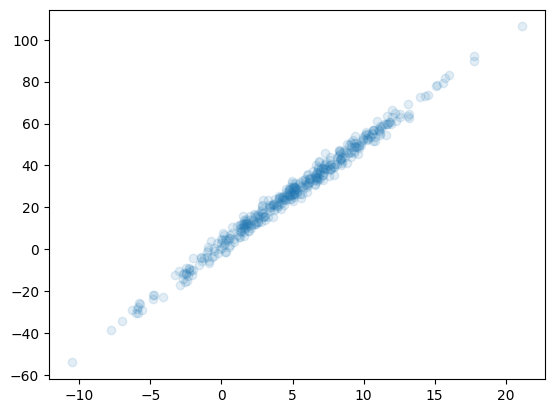

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(5, 5, 400)
y = 5*x + 2 + np.random.normal(0, 2.5, 400)
plt.scatter(x=x, y=y,alpha=0.125)
plt.show()

A variável ```y``` é gerada artificialmente a partir de um modelo linear $y = 5x +2$ sobreposto a um ruído Gaussiano.

Determine:

  a) Os valores de $\bar{x}$, $\bar{y}$

In [ ]:
x_bar = np.mean(x)
y_bar = np.mean(y)
print(x_bar, y_bar)

4.979073978237057 26.952430173682306


b) Os valores de $S_{xx}$, $S_{xy}$, $S_{yy}$

In [ ]:
s_xx = np.sum((x - x_bar)**2)
s_xy = np.sum((x - x_bar)*(y - y_bar))
s_yy = np.sum((y - y_bar)**2)

s_xx, s_xy, s_yy

(8980.688404939638, 44998.101325875075, 227763.87589025786)

c) Os valores de  $w_0$ e $w_1$ no modelo $y_i = w_0 + w_1 x_i + \epsilon_i$ de máxima verissimilhança.

In [ ]:
w_1 = s_xy/s_xx
w_0 = y_bar - w_1*x_bar
w_0, w_1

(2.004579265225704, 5.010540316834155)

d) Repita a plotagem *scatter* do enunciado sobreposta à reta $y=w_0 + w_1 x$

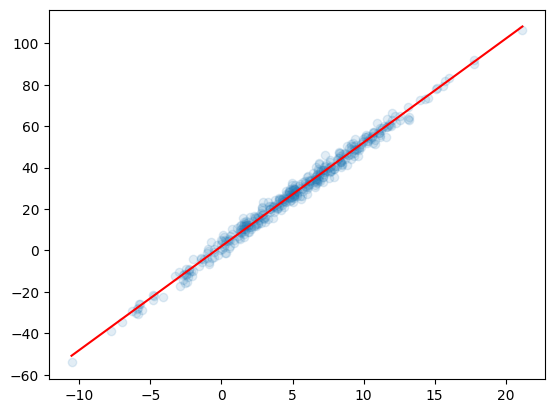

In [ ]:
size = np.linspace(min(x),max(x),100)
y_pred = w_0 + w_1*size

plt.plot(size, y_pred, 'r')
plt.scatter(x=x, y=y,alpha=0.125)
plt.show()

e) Calcule o resíduo quadrático total $\sum_i \epsilon_i^2$

In [ ]:
residuo = np.sum((y - (w_0 + w_1*x))**2)
residuo

2299.0750159723625

f) Calcule o coeficiente de correlação de Pearson
\begin{equation}
r = \frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

Compare o valor $s_{yy}(1-r^2)$ com o obtido no item e).

In [ ]:
pearson = s_xy/(np.sqrt(s_xx*s_yy))
pearson, residuo*(1-pearson**2)

(0.9949401408421255, 23.207130228215092)

g) Repita o processo (encontrando os valores de $w_0$, $w_1$, $r$ e a plotagem) usando a biblioteca ```sklearn```
Você deve usar a classe ```LinearRegression``` do pacote ```sklearn.linear_model```.

Crie um objeto da classe ```LinearRegression``` e invoque o método ```fit```, passando como parâmetros ```x.reshape(-1,1)``` (para transformar o vetor em uma matriz coluna) e ```y```.

O valor de $w_0$ pode ser encontrado no atributo ```ìntercept_```.
O valor de $w_1$ pode ser encontrado no primeiro coeficiente do atributo ```coef_```.

O coeficiente de Pearson *ao quadrado* $r²$ pode ser obtido do método ```score``` repassando a ele os mesmos dados passados em ```fit```.
Note que você deve extrair a raiz quadrada deste valor para obter $r$.

Para calcular o vetor de valores previstos, chame o método ```predict``` passando como parâmetro ```x.reshape(-1,1)```.


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
w_0_sk = reg.intercept_
w_1_sk = reg.coef_
r_sk = np.sqrt(reg.score(x.reshape(-1,1), y))
y_pred_sk = reg.predict(x.reshape(-1,1))

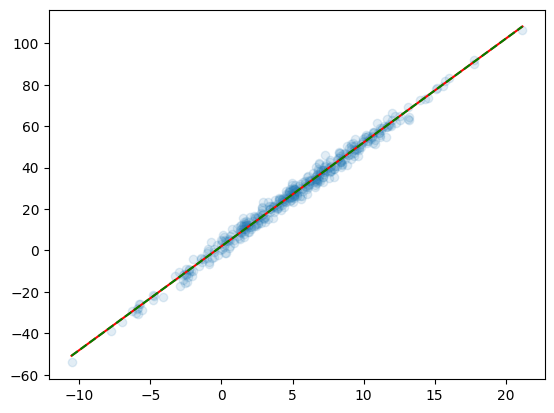

In [ ]:

size = np.linspace(min(x),max(x),100)
y_pred = w_0 + w_1*size
y_pred_sk = w_0_sk + w_1_sk*size

plt.plot(size, y_pred, 'r')
plt.plot(size, y_pred_sk, 'g',linestyle='--')

plt.scatter(x=x, y=y,alpha=0.125)
plt.show()

### Exercício 1.2

Este [arquivo](https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/escolas_turmas_alunos_2017.csv) contém um conjunto compilado de dados da Secretaria Estadual de Educação que trata de alunos do ensino médio em 2017.

A coluna ```CD_ESCOLA``` é um código interno da Secretaria que identifica uma Escola.

A coluna ```APR_3``` contém a taxa de aprovação no ensino médio por escola.

A coluna ```QTDE_ALUNOS``` contém o total de alunos matriculados no ensino médio por escola.

A coluna ```TURMAS``` contém a quantidade total de turmas de ensino médio.

O código a seguir importa os dados em uma base de dados Pandas de nome ```aprovacao_e_alunos_por_escola``` e computa uma nova coluna, ```MEDIA_POR_TURMA```, com o número médio de alunos por turma por escola.

Note que a quantidade de turmas varia significativamente de escola para escola.

,CD_ESCOLA,APR_3,QTDE_ALUNOS,TURMAS,MEDIA_POR_TURMA
0,21623,99.42,172,6,28.666667
1,21726,99.71,345,10,34.500000
2,21748,100.00,239,7,34.142857
3,41661,98.76,161,6,26.833333
4,49967,75.92,259,9,28.777778
...,...,...,...,...,...
3702,48461,89.52,120,4,30.000000
3703,49517,69.68,444,15,29.600000
3704,909524,75.24,259,10,25.900000
3705,914927,85.12,204,7,29.142857


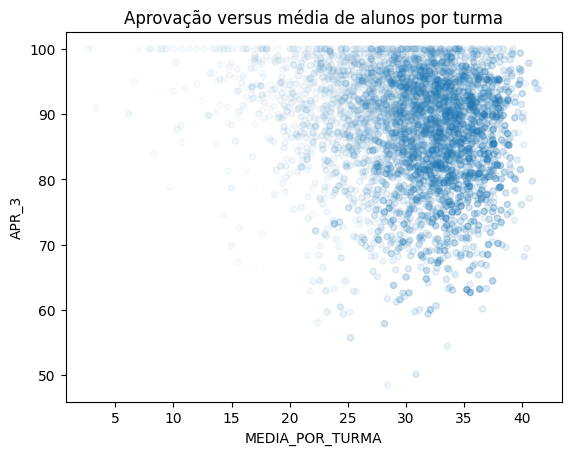

In [ ]:
import urllib.request as request
import io
import pandas as pd
aprovacao_e_alunos_por_escola=pd.read_csv(io.TextIOWrapper(request.urlopen("https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/escolas_turmas_alunos_2017.csv"), "utf-8-sig"))
aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'] = aprovacao_e_alunos_por_escola['QTDE_ALUNOS']/aprovacao_e_alunos_por_escola['TURMAS']
max_turmas = aprovacao_e_alunos_por_escola['TURMAS'].max()

opacidade = np.array(aprovacao_e_alunos_por_escola['TURMAS'])/(2*max_turmas)
aprovacao_e_alunos_por_escola.plot.scatter(x="MEDIA_POR_TURMA", y="APR_3", title="Aprovação versus média de alunos por turma", alpha =opacidade)
display(aprovacao_e_alunos_por_escola)
plt.show()

Deseja-se investigar uma possível relação linear entre a média de alunos por turma e a taxa de aprovação.

Para tanto determine:

a) Os coeficientes $w_0$ e $w_1$ de um modelo linear de aprovação em função do total de alunos matriculados.
Como mencionado, a quantidade de turmas varia significativamente de escola para escola.
Isso significa que o *peso* de cada ponto é diferente!
Você deve usar a quantidade de turmas como peso para fazer esta regressão.

#### *Sugestão*:
Use novamente a classe ```LinearModel```.
O método ```fit``` tem um terceiro parâmetro que recebe um vetor com os pesos relativos para cada amostra.

92.94108850188043 [-0.19263325]


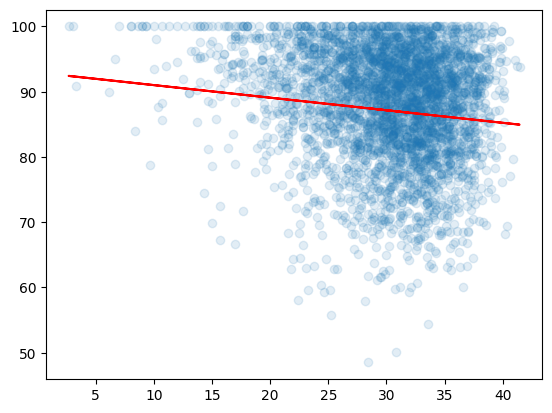

In [ ]:
model = LinearRegression()

model.fit(aprovacao_e_alunos_por_escola[['MEDIA_POR_TURMA']], aprovacao_e_alunos_por_escola['APR_3'], sample_weight = aprovacao_e_alunos_por_escola['TURMAS'])


w_0 = model.intercept_
w_1 = model.coef_
print(w_0, w_1)

y_pred = model.predict(aprovacao_e_alunos_por_escola[['MEDIA_POR_TURMA']])
plt.scatter(x=aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'], y=aprovacao_e_alunos_por_escola['APR_3'],alpha=0.125)
plt.plot(aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'], y_pred, 'r')

b) O coeficiente de correlação de Pearson $r$ e seu valor ao quadrado $r^2$



In [ ]:
pearson = np.sqrt(model.score(aprovacao_e_alunos_por_escola[['MEDIA_POR_TURMA']], aprovacao_e_alunos_por_escola['APR_3']))
pearson, pearson**2


(0.07676288838419042, 0.005892541033083676)

c) O gráfico do enunciado sobreposto à reta determinada no item a).

## 2. Regressão multi-Linear

A regressão multi-linear trata da relação de uma variável dependente com *múltiplas* variáveis independentes.


seja

\begin{equation}
Y = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_n\end{bmatrix}
\end{equation}

 um vetor com uma amostra do conjunto de variáveis independentes e

\begin{equation}
X = \begin{bmatrix}x_{1,1} & x_{1,2} & \ldots & x_{1,m} & 1\\
x_{2,1} & x_{2,2} & \ldots & x_{2,m} & 1\\
 \vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n,1} & x_{n,2} & \ldots & x_{n,m} & 1\end{bmatrix}
\end{equation}

uma matriz $n \times (m+1)$ cujas primeiras $m$ colunas são compostas por uma amostra de cada uma das $m$ variáveis independetes e a sua *última* coluna é composta da constante 1.

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
Y =  X W + E
\end{equation}

Onde:

\begin{equation}
W = \begin{bmatrix}w_1\\
w_2\\
\vdots\\
w_m\\
w_0
\end{bmatrix}
\end{equation}

é o vetor  de $(m+1)$ componentes dos coeficientes de cada uma das variáveis
independentes.
Note que nesta notação o coeficiente $w_0$ é o *último* coeficiente (há notações distintas nas quais ele é o primeiro).

$E$ é o vetor de *resíduos* (a diferença entre o modelo real e os dados realmente observados).

Seguindo a mesma hipótese de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*, o vetor $W$ de *máxima verissimilhança* é dado por:

\begin{equation}
\underset{W}{\mbox{arg min}}  \|E\|^2= \|Y-XW\|^2
\end{equation}

Se $W^*$ é ótimo deste problema, então vale

\begin{equation}
\left(X^T X\right)W^*=X^TY
\end{equation}

A solução deste sistema linear pode ser escrita como:
\begin{equation}
W^*=\left(X^T X\right)^{-1}X^TY
\end{equation}

e a matriz $\left(X^T X\right)^{-1}X$ é dita a *pseudo-inversa* de $X$.

*Nota*: Em geral não é eficiente calcular explicitamente esta matriz.

### Exercício 2.1

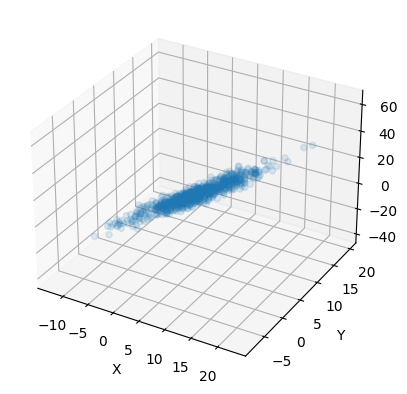

In [ ]:
x = np.random.normal(5, 5, 800)
y = np.random.normal(5, 5, 800)
z = 3*x + -2* y + 5 + np.random.normal(0,1,800)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha=0.125)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

A variável ```z``` acima é gerada através de um modelo linear $3x - 2y + 5$ sobreposto a um ruído Gaussiano.

a) Calcule através do método acima os coeficientes $w_1, w_2, w_0$ do modelo $z=w_1 x + w_2 y + w_0$ que melhor ajusta o cojunto de pontos das variáveis ```x```, ```y``` e ```z```.

*Nota*: Use a função ```np.linalg.solve(a, b)``` para resolver o sistema $ax=b$.

b) Repita a plotagem 3d do enunciado adicionando o plano que descreve a solução do item a).

*Sugestão*

Se as variáveis ```w_0```, ```w_1``` e ```w_2``` contém respectivamente os valores dos parâmetros $w_0$, $w_0$ e $w_2$, então o código abaixo adiciona o plano solicitado:

```
XX, YY = np.meshgrid(np.linspace(min(x),max(x),2),np.linspace(min(y),max(y),2))
ZZ = w0 + w1*XX + w2*YY
ax.plot_surface(XX, YY, ZZ, color='r', alpha=0.5)
```

c) Encontre os coeficientes usando a classe ```linear_model.LinearRegression``` do pacote```sklearn```.
Para montar o vetor de variáveis independentes, monte uma matriz com ```np.array([x,y]).T```.
O vetor de variáveis dependentes é o próprio vetor ```z```.

### Exercício 2.2 - Prevendo fenômenos periódicos

O seguinte [arquivo](https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/INMET_SE_SP_A705_BAURU.zip) contém dados do Instituto Nacional de Meterologia sobre precipitação na estação A705 em Bauru, desde 2001.

O código a seguir recupera o arquivo e extrai seu conteúdo na pasta ```inmet_bauru```.

In [ ]:
!wget https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/INMET_SE_SP_A705_BAURU.zip -O inmet_bauru.zip
!unzip -o inmet_bauru.zip -d inmet_bauru

Podemos usar o leitor de csv do Python para processar estes arquivos.
Note alguns aspectos:
 * As entradas estão organizadas por *horas*.
 * O campo ```PRECIPITAÇÃO TOTAL, HORÁRIO (mm)``` contém a precipitação total em milímetros que caiu durante uma hora.
 * Há uma inconsistência nos campos de data e horas.
 Alguns arquivos usam o campo ```DATA (YYYY-MM-DD)```, outros usam o campo ```Data``` para designar a data.
 Do mesmo modo, alguns usam o campo ```HORA (UTC)```, outros usam o campo ```Hora (UTC)```.
 Em ambos os casos, usa-se o fuso UTC.
 * Nem todo horário possui dados. Há uma nova inconsistência aqui.
 Alguns arquivos usam o valor -9999 para indicar uma entrada sem dados.
 Outros deixam esta entrada em vazio.

 O código abaixo cuida do processamento destes dados, usando a clase ```datetime```.

 Ele produz as seguintes variáveis:

 * ```data_inicial```. Um objeto ```datetime``` que marca um momento de referência (aqui, arbitrariamente definido como as zero horas do dia 1/1/2001.

 * ```datas```. Um vetor com objetos ```datetime``` que contém *todas* as horas contempladas pelo arquivo, inclusive as que não têm dados válidos de precipitação.

  * ```datas_validas```. Um vetor com objetos ```datetime``` que contém *todas* as horas que contém dados válidos de precipitação.

 *```horas_validas```. Um vetor de inteiros correspondentes às horas que contém dados de precipitação. As horas são definidas como a quantidade de horas passadas entre o momento em que elas ocorreram e  ```data_inicial```.

 *```preps```. Um vetor de floats com os dados de precipitação em mm correspondentes às ```datas_validas```.

In [ ]:
import csv
import datetime
import pathlib

# Data referência: 0 horas do dia 1/1/2001
data_inicial =  datetime.datetime.strptime("00:00 2001-01-01", "%H:%M %Y-%m-%d").replace(tzinfo=datetime.timezone.utc)

horas_validas = []
datas_validas = []
preps = []
datas = []
dados_presentes = []
arquivos = sorted(pathlib.Path("inmet_bauru").glob("INMET_SE_SP_A705_BAURU_*_A_31-12-*.CSV"), key=lambda path:path.name[-8:-4])
for f in arquivos:
    print(f)
    with open(f, encoding="iso-8859-1") as arquivo:
        # Pula 8 linhas
        for i in range(8):
            arquivo.readline()
        dr = csv.DictReader(arquivo, delimiter=";")
        campo_data = 'DATA (YYYY-MM-DD)'
        if campo_data not in dr.fieldnames:
            campo_data = 'Data'
        campo_hora = 'HORA (UTC)'
        if campo_hora not in dr.fieldnames:
            campo_hora = 'Hora UTC'
        for row in dr:
            dados_validos = 0
            try:
                data = datetime.datetime.strptime(row[campo_data] + " " + row[campo_hora], "%Y-%m-%d %H:%M").replace(tzinfo=datetime.timezone.utc)
            except ValueError:
                data = datetime.datetime.strptime(row[campo_data] + " " + row[campo_hora], "%Y/%m/%d %H%M %Z").replace(tzinfo=datetime.timezone.utc)
            datas.append(data)
            delta = data - data_inicial
            try:
                prep = float(row['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].replace(",","."))
                if prep>=0:
                    datas_validas.append(data)
                    horas_validas.append(int(24*delta.days + delta.seconds/3600))
                    preps.append(prep)
                    dados_validos = 1
            except ValueError:
                pass
            dados_presentes.append(dados_validos)
datas_validas = np.array(datas_validas)
horas_validas = np.array(horas_validas)
preps = np.array(preps)
dados_presentes = np.array(dados_presentes)

Observa-se que há muitos dados faltantes.
A plotagem a seguir indica os momentos para os quais há dados.
Note em particular a grande lacuna no início de 2004.

In [ ]:
plt.fill_between(datas,dados_presentes,0)

Podemos visualizar os dados de precipitação:

In [ ]:
plt.plot(datas_validas,preps)

Apesar de todo o ruído, observa-se no gráfico um fenômeno semi-periódico, que parece se repetir todo ano.
Isso é natural, dada a forte influência das estações do ano no regime pluviométrico.

Podemos identificar as componentes periódicas de uma série temporal usando uma regressão multi-linear com séries harmônicas.

De fato, se uma variável $y(t)$ possui uma componente periódica de período $T$, podemos aproximá-la pela série:

$\bar{y} + \sum_{i=1}^n s_i \sin(2\pi it/T) + c_i \cos(2\pi it/T)$

onde $\bar{y}$ é o valor médio da variável e $s_i$ e $c_i$, com $i$ de $1$ até $n$, são os coeficientes das funções seno e cosseno em diferentes subharmônicas do período principal $T$.

Estes coeficientes, mesmo em cenários de dados incompletos, podem ser obtidos por regressão multilinear.

Vamos fazê-lo para os dados de precipitação com 6 harmônicos.

Para tanto,

a) Monte a matriz de variáveis explicativas:

Considere que um ano *solar* tem aproximadamente 365 dias e 6 horas, ou seja, 8766 horas.
Este será o período base.

Vamos criar duas matrizes, a matriz ```senos``` com os senos e a matriz ```cossenos``` com os cossenos.

A matriz dos senos deve ter 6 colunas. Na sua $j$-ésima coluna os senos do vetor ```horas_validas``` multiplicado por $j+1$ (ou seja, começando em 1 e terminando em 6) e dividido por $2\pi/8766$.

A matriz dos cossenos deve ser equivalente, mas com a função cosseno.

Monte a matriz completa de variáveis explicativas ```senos_cossenos```  com o comando  ```senos_cossenos = np.concat([senos, cossenos], axis=1)```

Verifique que a matriz ```senos_cossenos``` tem 12 colunas e tantas linhas quanto as entradas no vetor ```preps```.


b) Usando a classe ```LinearRegression```, faça a regressão linear do vetor ```preps``` usando esta variável explicativa.

Mostre o comportamento anualizado.
Para isso, monte um vetor explicativo que abrange apenas o período de um ano (repetindo o processo do item a), mas agora, no lugar de ```horas_validas```, use ```np.arange(0,8766)```.
`
Usando o método ```predict```do seu modelo, crie um vetor de precipitação prevista.
Note que este vetor tem 8766 entradas, uma para cada hora de um ano.

Plote este vetor com o método ```plt.plot```.
Determine o momento de máxima precipitação.

c) A precipitação real é um fenômeno abrupto, que se manifesta intensamente por algumas poucas horas e cessa na maior parte do dia.
Assim é muito difícil compará-lo com uma linha de tendência que abrange um ano inteiro como no item anterior.

Podemos no entanto comparar a precipitação *acumulada* no ano.
O ano de 2020 é de particular interesse para esta comparação por que não tem lacunas.

O código abaixo usa o método ```cumsum()```, de soma cumulativa de um vetor, para obter a precipitação acumulada em 2020 na variável ```precipitacao_acumulada_2020```:

In [ ]:
data_inicio_acumulado = datetime.datetime.strptime("00:00 2020-01-01", "%H:%M %Y-%m-%d").replace(tzinfo=datetime.timezone.utc)
delta = data_inicio_acumulado - data_inicial
hora_inicio_acumulado = int(24*(delta.days) + (delta.seconds)/3600)
indice_inicial = np.where(np.array(horas_validas)==hora_inicio_acumulado)[0][0]
precipitacao_acumulada_2020 = preps[indice_inicial:indice_inicial+8766].cumsum()
plt.plot(precipitacao_acumulada_2020)

Use o método ```cumsum()``` no vetor de precipitação previsto obtido no ítem b) e repita a plotagem anterior, sobrepondo-a agora ao vetor de precipitação acumulada prevista.

## Regressão Polinomial

Dado $m$ conjuntos de $n$ dados dispostos na matriz $\mathbf{X} \in {\mathbb{R}}^{m\times n+1}$ rotulados por $\mathbf{y} \in {\mathbb{R}}^m$ já definimos anteriormente que o erro será minimizado quando
$$
\newcommand{\mw}{\mathbf w}\mw = (\newcommand{\mX}{\mathbf X} \mX^T \mX)^{-1} \mX^T \newcommand{\my}{\mathbf y} \my
$$

Seja agora o caso de uma variável ${\mathbf y} = \{y_1, \ldots, y_{n}\}$ avaliada nos pontos ${\mathbf x} = \{x_1, \ldots, x_{n}\}$.

Podemos usar a mesma ideia da regressão multi-Linear para aproximar esta variável por um polinômio.

De fato, considere que a matriz ${\mX}$ é uma matriz cujas colunas são as potências dos coeficientes do vetor ${\mathbf x}$.
Então o vetor ${\mathbf w}$ é o vetor dos coeficientes do polinômio $w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m$ que aproxima a variável.

Neste caso ${\mX}_{i,j} = x_i^j$



### Exercício 3

Os dados para o exercício foram gerados artificialmente, com a equação básica dada por,
$$
y=0.3x^3-20x^2+5x-4
$$


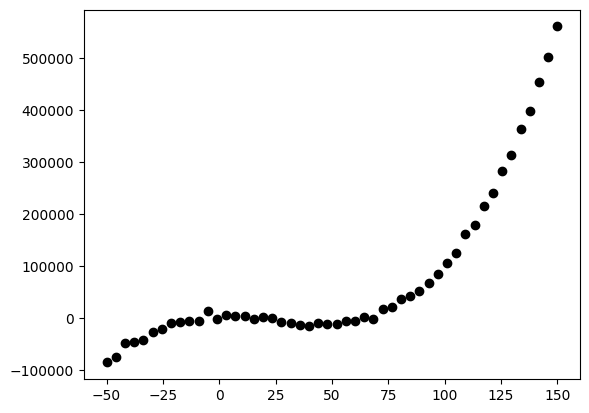

In [ ]:
x=np.linspace(-50,150,50)
y=0.3*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")
plt.show()

Recupere os coeficientes de regressão para polinômios de grau 1, 2 e 3.
Para cada um destes, identifique o erro quadrático médio.

*Sugestão*: Você pode usar numpy para construir a matriz ${\mathbf X}$, a matriz ${\mathbf X}^T{\mathbf X}$ e o vetor ${\mathbf X}^T {\mathbf y}$. Em seguida use ```numpy.linalg.solve``` para resolver o sistema linear.

Alternativamente, você pode continuar usando ```LinearModel``` e a` classe ```PolinomialFeatures``` do pacote ```sklearn.preprocessing``` para gerar a base de vetores de variáveis independentes.
Para construir um objeto de *features* de grau ```n```, use a sintaxe ```PolinomialFeatures(degree=n)```.
O objeto pode ser usado para construir a base de variáveis independentes nos pontos do vetor unidimensional ```x``` com a chamada ao método ```fit_transform(x.reshape(-1,1))```. A matriz de variáveis independentes resultante pode ser usada diretamente por um objeto.

O valor do resíduo quadrático médio pode ser calculado diretamente por ```sklearn``` usando a função  ```sklearn.metrics.mena_squared_error```. Se ```y``` contém os valores reais da variável e ```y_previsto``` os valores previstos, então ```mean_squared_error(y, y_previsto)``` retorna o erro quadrático médio.